Running test case 0 with input '[1,0,1,1,0,1,1,1]'...
Correct!
Running test case 1 with input '[0,0,0,0,0,1,0,1]'...
Correct!


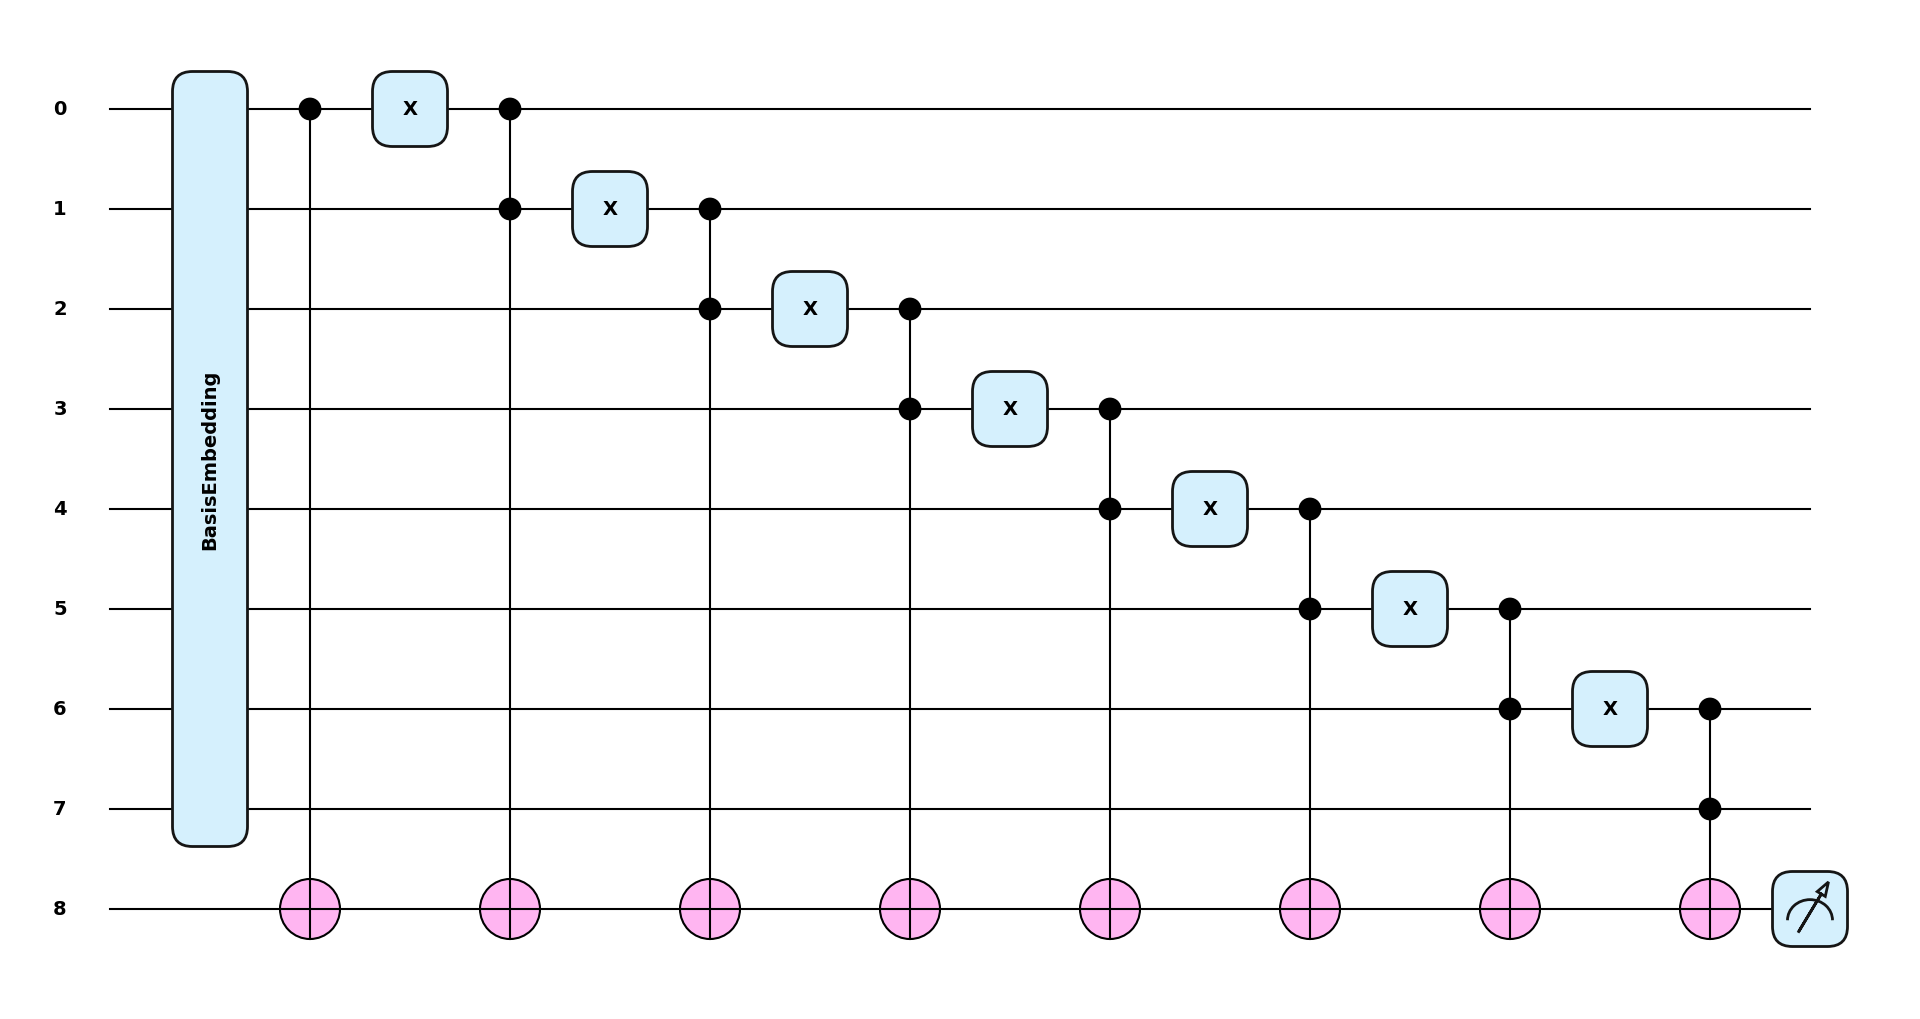

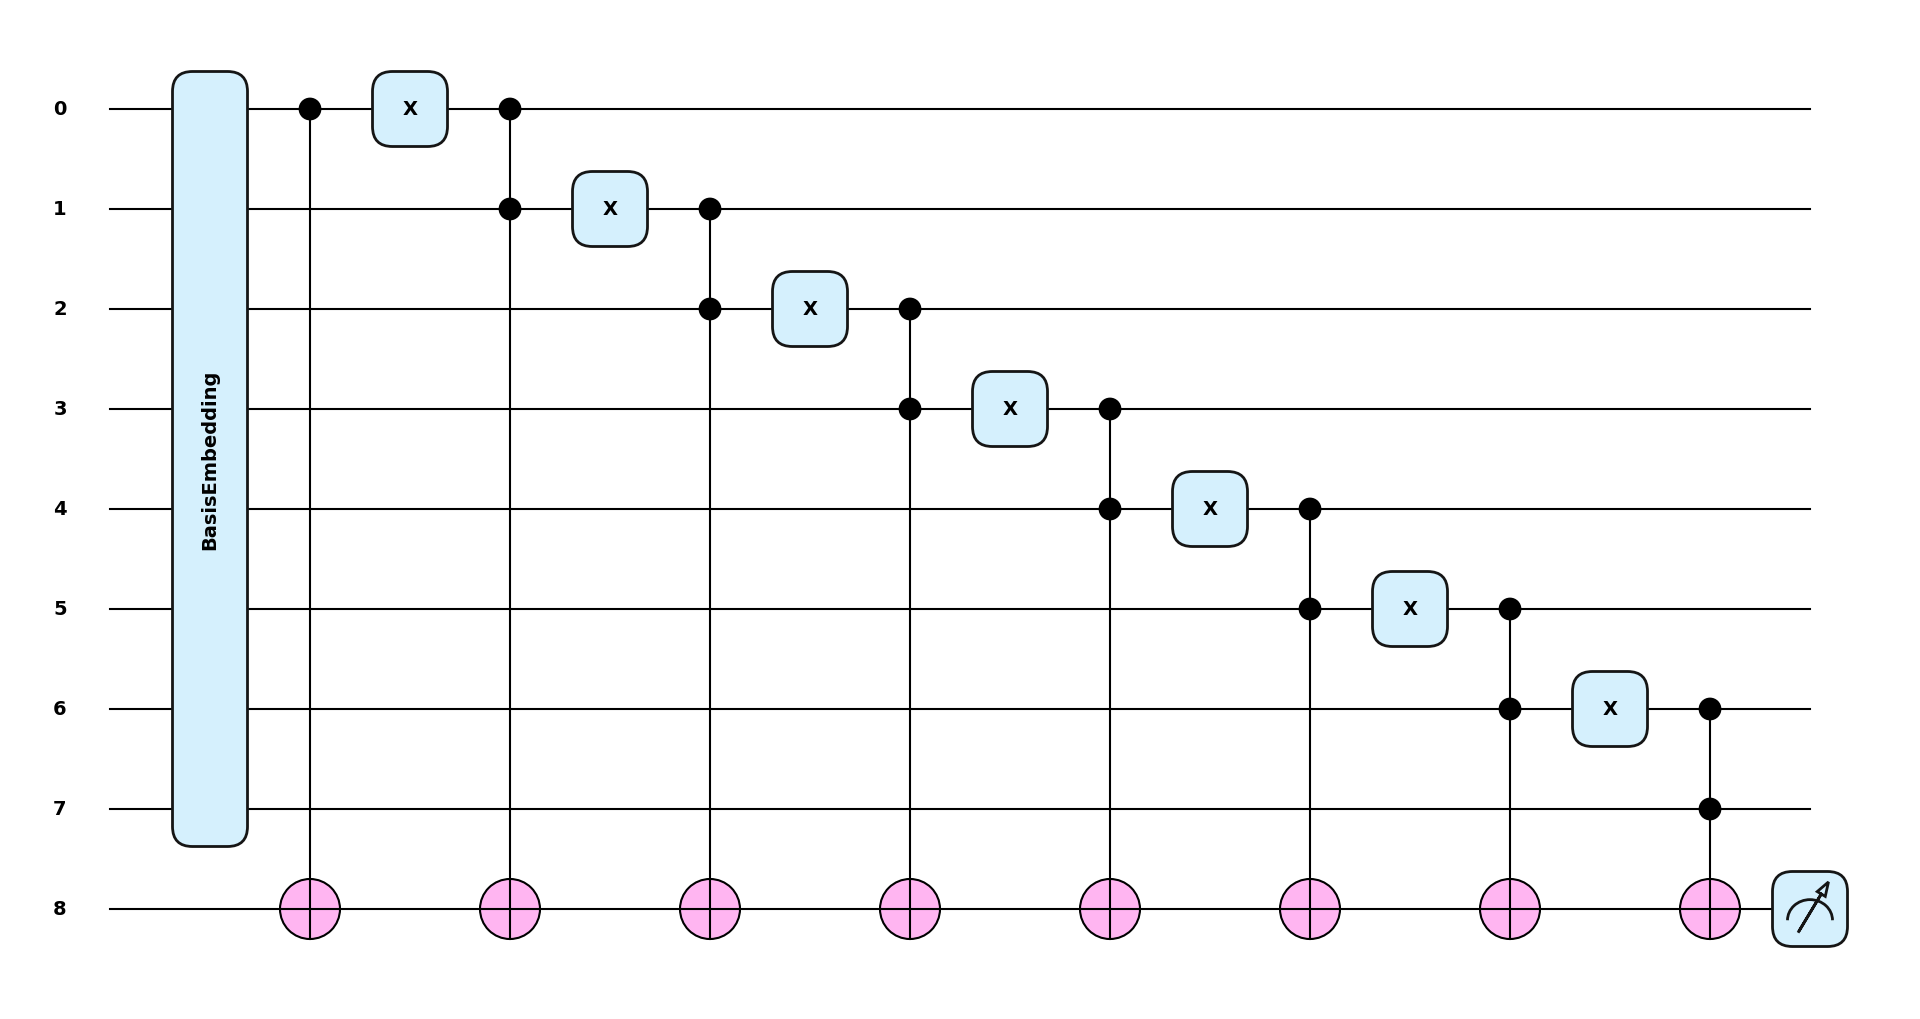

In [6]:
import json
import pennylane as qml
import pennylane.numpy as np

def U():
    """
    Creates the gate that checks the parity of the number of forests.
    It should not return anything, you simply need to add the gates.
    """


    # Put your code here #
    qml.CNOT(wires = [0,8])
    for i in range(7):
        qml.PauliX(wires = i)
        qml.Toffoli(wires = [i,i+1,8])
    

# These functions are responsible for testing the solution.


def run(test_case_input: str) -> str:

    input = json.loads(test_case_input)
    wires_input = [0,1,2,3,4,5,6,7]

    dev = qml.device("default.qubit", wires = 10, shots = 10)

    @qml.qnode(dev)
    def circuit():
      qml.BasisEmbedding(input, wires = wires_input)

      U()
      
      return qml.probs(wires = 8)
    _ = qml.draw_mpl(circuit, style="pennylane")()
    return str(float(circuit()[1]))


def check(have: str, want: str) -> None:

    assert np.isclose(float(have), float(want)), "Wrong answer!"


# These are the public test cases
test_cases = [
    ('[1,0,1,1,0,1,1,1]', '1'),
    ('[0,0,0,0,0,1,0,1]', '0')
]

# This will run the public test cases locally
for i, (input_, expected_output) in enumerate(test_cases):
    print(f"Running test case {i} with input '{input_}'...")

    try:
        output = run(input_)

    except Exception as exc:
        print(f"Runtime Error. {exc}")

    else:
        if message := check(output, expected_output):
            print(f"Wrong Answer. Have: '{output}'. Want: '{expected_output}'.")

        else:
            print("Correct!")